In [2]:
import h2o
import numpy as np
import pandas as pd
from sklearn import datasets

In [3]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_181"; Java(TM) SE Runtime Environment (build 1.8.0_181-b13); Java HotSpot(TM) 64-Bit Server VM (build 25.181-b13, mixed mode)
  Starting server from /Users/anmol/anaconda3/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/c7/lxw5_lpx2018kgdjjfy_m00r0000gn/T/tmpwg7xuqx6
  JVM stdout: /var/folders/c7/lxw5_lpx2018kgdjjfy_m00r0000gn/T/tmpwg7xuqx6/h2o_anmol_started_from_python.out
  JVM stderr: /var/folders/c7/lxw5_lpx2018kgdjjfy_m00r0000gn/T/tmpwg7xuqx6/h2o_anmol_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Asia/Kolkata
H2O data parsing timezone:,UTC
H2O cluster version:,3.20.0.5
H2O cluster version age:,17 days
H2O cluster name:,H2O_from_python_anmol_j0ppg0
H2O cluster total nodes:,1
H2O cluster free memory:,1.778 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [4]:
boston_data = datasets.load_boston()
boston_df = df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
boston_df['PRICE'] = boston_data.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
boston = h2o.H2OFrame(boston_df)
boston.summary()

/Users/anmol/anaconda3/lib/python3.6/site-packages/h2o/utils/shared_utils.py:177: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
type,real,real,real,int,real,real,real,real,int,int,real,real,real,real
mins,0.00632,0.0,0.46,0.0,0.385,3.561,2.9,1.1296,1.0,187.0,12.6,0.32,1.73,5.0
mean,3.59376071146245,11.363636363636365,11.136778656126484,0.0691699604743083,0.554695059288538,6.28463438735178,68.5749011857708,3.7950426877470367,9.549407114624506,408.23715415019757,18.455533596837927,356.6740316205534,12.653063241106722,22.532806324110666
maxs,88.9762,100.0,27.74,1.0,0.871,8.78,100.0,12.1265,24.0,711.0,22.0,396.9,37.97,50.0
sigma,8.596782593323324,23.32245299451514,6.860352940897589,0.25399404134041037,0.11587767566755584,0.7026171434153232,28.148861406903595,2.1057101266276104,8.707259384239366,168.53711605495903,2.1649455237144455,91.29486438415782,7.141061511348571,9.197104087379815
zeros,0,372,0,471,0,0,0,0,0,0,0,0,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [6]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
train,test = boston.split_frame([0.8])
mDL = H2ODeepLearningEstimator(max_runtime_secs=300)
mDL.train(["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"],"PRICE",train)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [7]:
mDL.plot()

<Figure size 640x480 with 1 Axes>

In [8]:
mDL.model_performance(test)


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 21.443747957405055
RMSE: 4.630739461188143
MAE: 3.7022047076245084
RMSLE: 0.22528477201669228
Mean Residual Deviance: 21.443747957405055


In [11]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator
m2 = H2OGradientBoostingEstimator(model_id='overfit', ntrees=1000, max_depth=10)
X = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]
y = "PRICE"
m2.train(X,y,train)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [13]:
train,valid,test = boston.split_frame([0.8,0.1])
mDL = H2ODeepLearningEstimator()
mDL.train(X,y,train, validation_frame=valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [14]:
mDL.model_performance(test)


ModelMetricsRegression: deeplearning
** Reported on test data. **

MSE: 41.560383032144145
RMSE: 6.446734292038423
MAE: 5.550944914125252
RMSLE: 0.3176461367722542
Mean Residual Deviance: 41.560383032144145


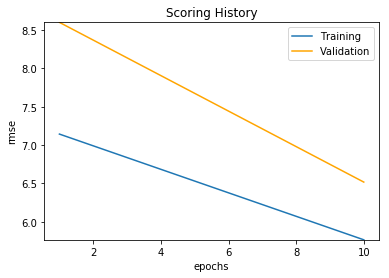

In [15]:
mDL.plot()